![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Si cada registro de la tabla es el número rentas de bicibletas rentadas en una hora, los resultados indican que pra **winter (1)** el promedio es de 116.34 bicicletas rentadas por hora, para **spring (2)** se rentan en promedio 215.25 bicicletas por hora, **summer (3)** 234.41 bicicletas por hora y **fall (4)** el promedio es de 198.98 bicicletas por horas, lo anterior muestra que las estaciones en donde más rentan bicicletas por hora es spring y summer, en la tabla se puede observar que la media esta a la derecha de la mediana es decir que que las distribuciones son asimetricas, en otras palabras presentan datos atipicos, es decir existen en cada estación horas en donde se rentan muchas mas bicicletas de lo comun.

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

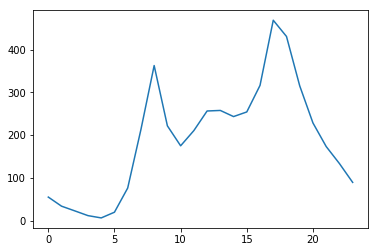

In [7]:
#plt.plot(bikes['total'])
plt.plot(bikes.groupby('hour').total.mean())

Las horas del día en donde existe mayor alquiler de bicicletas en promedio esta en la mañana entre las 7 y 9 con el mayor promedio a las 8 con 362 alquileres, en la tarde el promedio de alquiler de bicicletas aumenta en las horas  16 a 19 horas, siendo el mayor promedio las 17 con 468 alquileres y las 18 un promedio de 430. en el gráfico se puede observar claramente el comportamiento por horas del día.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

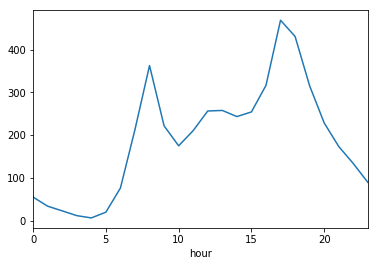

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

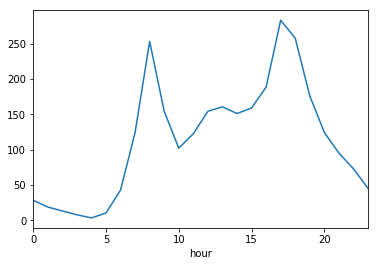

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
invierno = bikes.loc[bikes.loc[:,'season'] == 1]
invierno.groupby('hour').total.mean().plot()

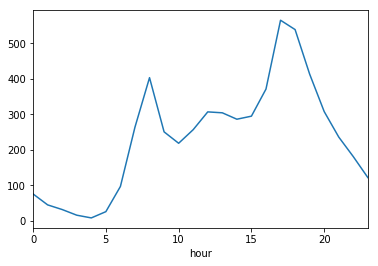

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes.loc[bikes.loc[:,'season'] == 3]
verano.groupby('hour').total.mean().plot()

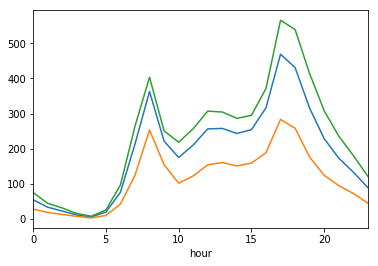

In [11]:
bikes.groupby('hour').total.mean().plot()
invierno.groupby('hour').total.mean().plot()
verano.groupby('hour').total.mean().plot()

Según los gráficos anteriores se puede observar que el comportamiento de alquiler de bicicletas a diario es similar para invierno y verano, sin embargo el número de bicicletas alquiladas en invierno (linea naranja) es menor al promedio de bicicletas alquiladas diariamente en cada una de las horas específicas, mientras que en verano (linea verde) el número de bicicletas alquiladas es incluso mayor al promedio general de alquileres por hora.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
XTotal = bikes.loc[:,['season','hour']] #filtrado de variables para el modelo de regresión.
yTotal = bikes.loc[:,['total']] #filtrado de variables para el modelo de regresión.

In [13]:
dummies = pd.get_dummies(XTotal.season, prefix='S' , prefix_sep='_') #Season a dummies
XTotal = pd.concat([XTotal, dummies], axis = 1) # concatenar las variables dummies a la base
XTotal =  XTotal.drop(columns=['season','S_4']) # Elimina la varible season y la ultima variable dummy
XTotal.head()

,hour,S_1,S_2,S_3
datetime,,,,
2011-01-01 00:00:00,0,1,0,0
2011-01-01 01:00:00,1,1,0,0
2011-01-01 02:00:00,2,1,0,0
2011-01-01 03:00:00,3,1,0,0
2011-01-01 04:00:00,4,1,0,0


In [14]:
# Creación del modelo de regresión
lr_model = LinearRegression()
lr_model.fit(XTotal,yTotal)

LinearRegression()

In [15]:
r_sq = lr_model.score(XTotal,yTotal)
print(f'R cuadrado del modelo {r_sq}')
print(f'Intercepto del modelo {lr_model.intercept_}')
print(f'Coeficientes del modelo {lr_model.coef_}')

R cuadrado del modelo 0.22339339904452493
Intercepto del modelo [77.65285541]
Coeficientes del modelo [[ 10.54520609 -84.08311787  16.23411404  35.38443207]]


In [16]:
y_pred = lr_model.predict(XTotal)
MSE=np.average(np.square(y_pred-yTotal))
print('MSE regresión:')
print(MSE)

MSE regresión:
25480.694694371625


Se transforma la variable categórica season a variables dummies. dejando como variable de referencia la última categoría (4), se elimina la variable season y la variable de referencia, se obtiene la matriz de variables independientes y la matriz con la variable dependiente en este caso ytotal y se procede a construir el modelo. 

Como resultado, al ajustar un modelo de regresión lineal con el objetivo de predecir el total de bicicletas rentadas por hora en función de las variables season y hour, se tiene que: 

El modelo de regresión lineal tiene un r cuadrado de 0,223 el cual indica que las variables independientes explican en un 22%, el número de bicicletas rentadas por hora, lo anterior indica que el modelo construido tiene un bajo ajuste a los datos reales. 

Para el ejercicio se identificaron los **coeficientes** que serán interpretados a continuación: 

Intercepto: El número de bicicletas rentadas para la hora 0 y season (4) fall el número de bicicletas rentadas será de 77.65 esto sucede cuando todas las variables independientes son cero. 
Coeficiente hour: Por cada hora que aumente, el número de bicicletas rentadas aumentará en 10.54 
Coeficiente S_1: Si la estación es invierno (1) disminuirá en 84.08 bicicletas rentadas por hora. 
Coeficiente S_2: Si la estación es primavera (2) el número de bicicletas rentadas por hora aumentará en 16,2. 
Coeficiente S_3: Si la estación es verano (3) el número de bicicletas rentadas por hora aumentará en 35,38.

En este caso las **limitaciones** de aplicar un modelo de regresión lineal es, al tener un conjunto de datos que tienen comportamientos estacionales no es representado por un modelo que representa una línea recta o un hiperplano al comportamiento real de los datos, esto se evidencia por el r cuadrado o ajuste del modelo que en este caso es es bajo. 

La regresión lineal es un modelo poco flexible y con mucho sesgo lo cual hace difícil obtener ajustes elevados a los datos reales.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [17]:
# Celda 4
XTotal = bikes.loc[:,['season','hour']] #filtrado de variables para el modelo de regresión.
yTotal = bikes.loc[:,['total']] #filtrado de variables para el modelo de regresión.
XTotal.head()

,season,hour
datetime,,
2011-01-01 00:00:00,1,0
2011-01-01 01:00:00,1,1
2011-01-01 02:00:00,1,2
2011-01-01 03:00:00,1,3
2011-01-01 04:00:00,1,4


In [18]:
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [19]:
# Impresión variable a usar (hour)
j = 1
print(XTotal.columns[j])

hour


In [20]:
# División de la variable Hours en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(XTotal.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

In [21]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = XTotal.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = yTotal.loc[filter_l]
y_r = yTotal.loc[~filter_l]

In [22]:
# Promedio de alquileres de la rama izquierda
y_l.mean()

total    118.348171
dtype: float64

In [23]:
# Promedio alquileres del total de datos
yTotal.mean()

total    191.574132
dtype: float64

In [24]:
# MSE del conjunto de datos total
aa = np.average(np.square(yTotal-yTotal.mean()))
aa

32810.2988862343

In [25]:
# Definición de la función que calcula el MSE index
def MSE(y):
    if y.shape[0] == 0:
        return 0
    else:
        return np.average(np.square(y-y.mean()))

In [26]:
# MSE de las observaciones que tienen un valor menor al punto de corte seleccionado
MSE_l = MSE(y_l)
MSE_l

22404.882286091048

In [27]:
# MSE de las observaciones que tienen un valor mayor al punto de corte seleccionado
MSE_r = MSE(y_r)
MSE_r

32551.242665177695

In [28]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def MSE_gain(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    MSE_y = MSE(y)
    MSE_l = MSE(y_l)
    MSE_r = MSE(y_r)
    
    MSE_gain_ = MSE_y - (n_l / (n_l + n_r) * MSE_l + n_r / (n_l + n_r) * MSE_r)
    
    return MSE_gain_

In [29]:
# Ganancia de la variable 'hour' en el punto de corte selecionado
MSE_gain(XTotal.iloc[:, j], yTotal, splits[k])

5305.206789895026

In [30]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = MSE_gain(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [31]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(XTotal, yTotal, 5)
j, split, gain

(1, 8.0, 9134.40591176651)

In [32]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = XTotal.iloc[:, j] < split

y_l = yTotal.loc[filter_l]
y_r = yTotal.loc[~filter_l]

In [33]:
yTotal.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [34]:
yTotal.mean(), y_l.mean(), y_r.mean()

(total    191.574132
 dtype: float64, total    55.437674
 dtype: float64, total    258.671558
 dtype: float64)

In [35]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        #tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()
    #y_pred = int(y.mean() >= 0.5)
    #y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    #tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [36]:
# Aplicación de la función tree_grow
tree_grow(XTotal, yTotal, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': total    191.574132
 dtype: float64,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 9134.40591176651,
 'sl': {'y_pred': total    55.437674
  dtype: float64,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 3603.8503299798276},
 'sr': {'y_pred': total    258.671558
  dtype: float64,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 3696.460396080329}}

In [37]:
tree = tree_grow(XTotal, yTotal, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': total    191.574132
 dtype: float64,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 9134.40591176651,
 'sl': {'y_pred': total    55.437674
  dtype: float64,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 3603.8503299798276,
  'sl': {'y_pred': total    32.582032
   dtype: float64,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 323.4004463794779,
   'sl': {'y_pred': total    25.17772
    dtype: float64,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 191.40441543023144},
   'sr': {'y_pred': total    76.259341
    dtype: float64,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 371.54779616750875}},
  'sr': {'y_pred': total    213.116484
   dtype: float64,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 455,
   'gain': 2598.553552876696,
   'sl': {'y_pred': total    124.433628
    dtype: float64, 'level': 3, 'split': -1, 'n_samples': 113, 'gain': 0},
   'sr': {'y_pred': total   

In [38]:
predicted = np.zeros(XTotal.shape[0])
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.zeros(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted + tree['y_pred']
        else:
            predicted = predicted + tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
    return predicted

In [ ]:
# Ejecución de función tree_predict
tree_predict(XTotal, tree)

En la construcción del árbol de decisión de forma manual, se toma como el referencia el ejercicio desarrollado en el laboratorio de árboles de decisión y ensamblajes, para este ejercicio el árbol que se aplicó fue un árbol de regresión por lo tanto, la métrica que se usó en este caso fue MSE calculado manualmente para determinar si las particiones hechas disminuyen el error de predicción, adicional, como valor predicho se toma le valor promedio de los alquileres de los registros que quedaron en cada uno de los nodos finales o nodos hojas. 

El árbol tiene 7 nodos finales (hoja) y utiliza las variables de hour y season.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [41]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    Regressor = DecisionTreeRegressor(criterion="friedman_mse",max_depth=depth, random_state=1)
    #accuracy_scores.append(cross_val_score(Regressor, XTotal, yTotal, cv=10, scoring='accuracy').mean())
    accuracy_scores.append(cross_val_score(Regressor, XTotal, yTotal, cv=20, scoring ='r2').mean())

In [42]:
accuracy_scores

[-0.5758994486504518,
 -0.6138283803859256,
 -0.5590299921604182,
 -0.11605235482242807,
 0.17490494444402188,
 0.21994215109388246,
 0.20225421148984682,
 0.19598676977379853,
 0.19502126179717466,
 0.19476356591139504,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853,
 0.19476530308333853]

Text(0, 0.5, 'r2')

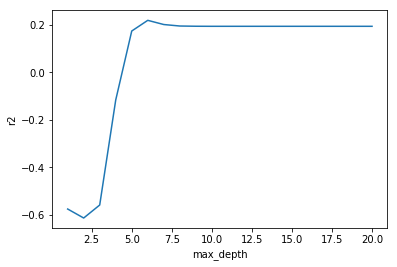

In [43]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('r2')

In [44]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.21994215109388246, 6)

In [45]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
Regressor = DecisionTreeRegressor(max_depth=6, random_state=0)
Regressor.fit(XTotal, yTotal)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [46]:
y_pred = Regressor.predict(XTotal)
MSE=np.average(np.square(y_pred-np.array(yTotal)))
print('MSE Arbol regresión:')
print(MSE)

MSE Arbol regresión:
52485.748941320264


El modelo de árbol de decisión utilizando la librería sklearn, da como resultado un MSE de 52485 des pues de varia iteraciones buscando encontrar la profundidad que minimice el error generado en la predición

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [47]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [48]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [49]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

### Arbol de decisión

In [50]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

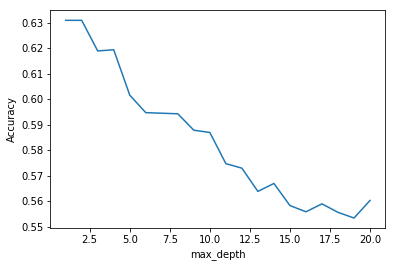

In [51]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [52]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [53]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [54]:
prediccionTree=clf.predict_proba(X_test)[:,0]
prediccionTree

array([0.28990228, 0.42093023, 0.28990228, ..., 0.42093023, 0.57958601,
       0.71396396])

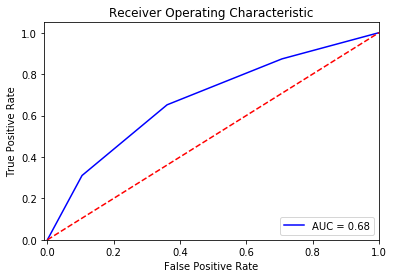

In [55]:
prediccionTree=clf.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# predicción sobre la muestra de comprobación.
y_pred = clf.predict(X_test, check_input=True)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
# Metricas de Accuracy y F1-Score
F1 = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)
F1, Accuracy

(0.6448598130841121, 0.6453333333333333)

### Regresión logística

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

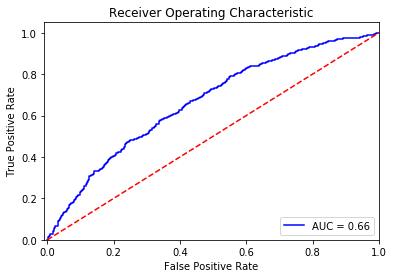

In [60]:
prediccionTree=clfRegLog.predict_proba(X_test)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)

In [62]:
# Metricas de Accuracy y F1-Score
F1 = metrics.f1_score(y_test, prediccionesRegLog)
Accuracy = metrics.accuracy_score(y_test, prediccionesRegLog)
F1, Accuracy

(0.6057692307692308, 0.6173333333333333)

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

#### votación mayoritaria Arboles de decisión max_depth

In [125]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [127]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1Tree = metrics.f1_score(y_pred, y_test)
AccTree = metrics.accuracy_score(y_pred, y_test)
F1Tree, AccTree

(0.657771847898599, 0.658)

Modelo con maxima profundidad de 6 el cual entrega un accuracy de 0.658 usando 100 muestras.

#### Votación mayoritaria Arboles de decisión min_samples_leaf

In [129]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, min_samples_leaf=50), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [130]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1Leaf = metrics.f1_score(y_pred, y_test)
AccLeaf = metrics.accuracy_score(y_pred, y_test)
F1Leaf, AccLeaf

(0.6711229946524064, 0.672)

Modelo con minimo de registros de 50 en los nodos hoja, arroja un accuracy de 0.672

#### Votación mayoritaria regresión lógistica

In [131]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [132]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1RegLog = metrics.f1_score(y_pred, y_test)
AccRegLog = metrics.accuracy_score(y_pred, y_test)
F1RegLog, AccRegLog

(0.6101928374655647, 0.6226666666666667)

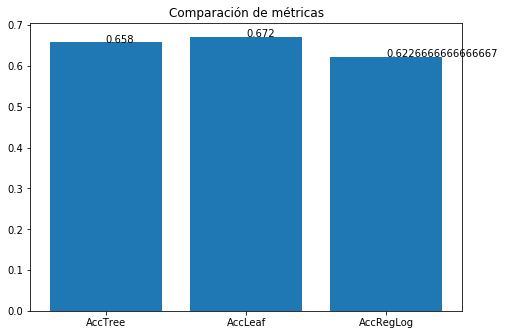

In [134]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['AccTree','AccLeaf','AccRegLog']
ejeY = [AccTree,AccLeaf,AccRegLog]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Al comparar el Accuracy con los tres métodos planteados, se puede observar que se obtiene un mejor resultado cuando se configura el número de registros minimos en cada hoja del árbol, un comportamiento similiar se obtiene cuando se compara la metrica F1 para cada modelo.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

#### Arboles de decisión votación ponderada


In [135]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, random_state=1), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [136]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1Tree = metrics.f1_score(y_pred, y_test)
AccTree = metrics.accuracy_score(y_pred, y_test)
F1Tree, AccTree

(0.657771847898599, 0.658)

In [137]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [138]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6640159045725645, 0.662)

#### Árboles de decisión votación ponderada con minimo registros en nodos hoja

In [140]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, min_samples_leaf=50), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [141]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1Leaf = metrics.f1_score(y_pred, y_test)
AccLeaf = metrics.accuracy_score(y_pred, y_test)
F1Leaf, AccLeaf

(0.6711229946524064, 0.672)

In [142]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [143]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6697798532354903, 0.67)

#### Votación ponderada para regresión lógistica

In [144]:
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [145]:
# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1RegLog = metrics.f1_score(y_pred, y_test)
AccRegLog = metrics.accuracy_score(y_pred, y_test)
F1RegLog, AccRegLog

(0.6101928374655647, 0.6226666666666667)

In [146]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [147]:
# Desempeño al hacer votación ponderada
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6095369730476848, 0.6233333333333333)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Para el árbol de decisión el cual define la profundidad máxima, se tiene que al comparar las métricas f1 y el Accuracy para votación mayoritaria y votación ponderada, arroja un mejor resultado cuando se ponderan los resultados de cada modelo obteniendo una mejora en las métricas Accuracy de 0.658 a 0.662 respectivamente. 

Para el modelo de árbol de decisión en donde se define la cantidad de registros que debe tener el nodo hoja 50 en total, la votación ponderada no mejora 0.67 a la clasificación del modelo, para este caso los resultados de la votación mayoritaria genera un accuracy de 0.672 que es levemente mayor.

Para el modelo de regresión logística, la construcción de varios clasificadores, al elegir la votación ponderada 0.623 mejora un poco respecto a la votación mayoritaria 0.622, sin embargo los cambios no son significativos de uno al otro

**Ventajas**
Para el árbol de decisión el cual define la profundidad máxima, se tiene que al comparar las métricas f1 y el Accuracy para votación mayoritaria y votación ponderada, arroja un mejor resultado cuando se ponderan los resultados de cada modelo obteniendo una mejora en las métricas Accuracy de 0.658 a 0.662 respectivamente. 

Al tener en cuenta el error de predicción y poder dar menor peso a los modelos que generan mayores errores permite fortalecer la decisión en cuanto a la clasificación de un registro para este caso si la noticia es popular o no es popular.

**Desventajas**
Este proceso puede ser computacionalmente costoso debido a la gran cantidad de modelos que se pueden aplicar para poder clasificar un registro por medio de una votación mayoritaria o votación ponderada. 

Algunas desventajas también podrían ser la selección de variables que debe hacerse previamente para definir Cuáles variables importan y no importan dentro del modelo.
